<a href="https://colab.research.google.com/github/markinivan/Machine-learning/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: Предсказание потенциального банкротства компании на основе разнообразных экономических данных (прибыль, активы, долги, продажи и т.д.)

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

# Чтение ARFF файла
data, meta = arff.loadarff('/content/sample_data/data.arff')
df = pd.DataFrame(data)

# Преобразование целевой переменной из bytes в str
df['class'] = df['class'].str.decode('utf-8')

print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о датасете:")
print(df.info())

Размер датасета: (7027, 65)

Первые 5 строк:
      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Разделение на признаки и целевую переменную
X = df.drop('class', axis=1)
y = df['class']

# Преобразуем целевую переменную в числовой формат
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке: {np.bincount(y_train)}")
print(f"Распределение классов в тестовой выборке: {np.bincount(y_test)}")


Размер обучающей выборки: (4918, 64)
Размер тестовой выборки: (2109, 64)

Распределение классов в обучающей выборке: [4728  190]
Распределение классов в тестовой выборке: [2028   81]



Базовые статистики:
             Attr1        Attr2        Attr3        Attr4         Attr5  \
count  7024.000000  7024.000000  7024.000000  6997.000000  7.019000e+03   
mean      0.034660     0.560215     0.119969     2.629143 -2.631672e+02   
std       4.565504     5.350084     5.275459    13.257356  3.707460e+04   
min    -256.890000   -72.162000  -440.500000     0.000000 -2.722100e+06   
25%       0.021182     0.296678     0.026968     1.063100 -4.449800e+01   
50%       0.075802     0.482960     0.181275     1.502000 -5.373900e+00   
75%       0.160268     0.680233     0.362548     2.460700  3.777050e+01   
max      94.280000   441.500000     1.000000  1017.800000  9.909000e+05   

             Attr6        Attr7        Attr8        Attr9       Attr10  ...  \
count  7024.000000  7024.000000  7002.000000  7026.000000  7024.000000  ...   
mean      0.059712     0.313876     2.623996     5.552855     1.825832  ...   
std       6.051113     8.353274    18.708327   101.995448    33.83

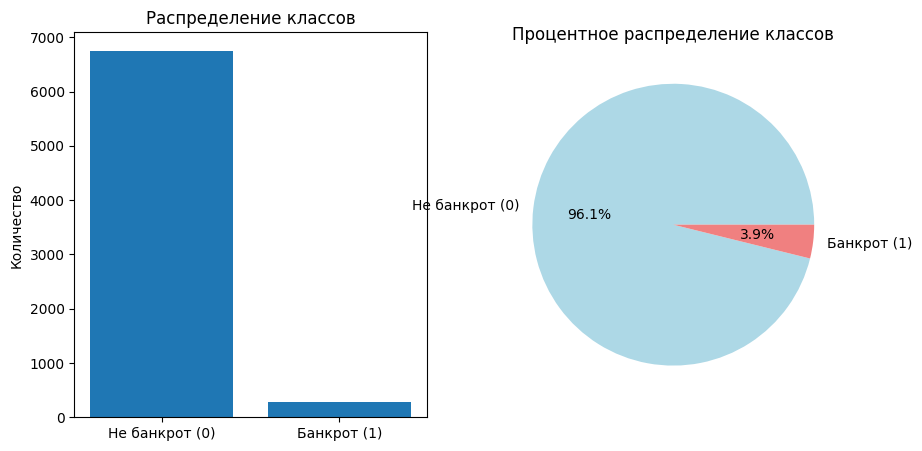

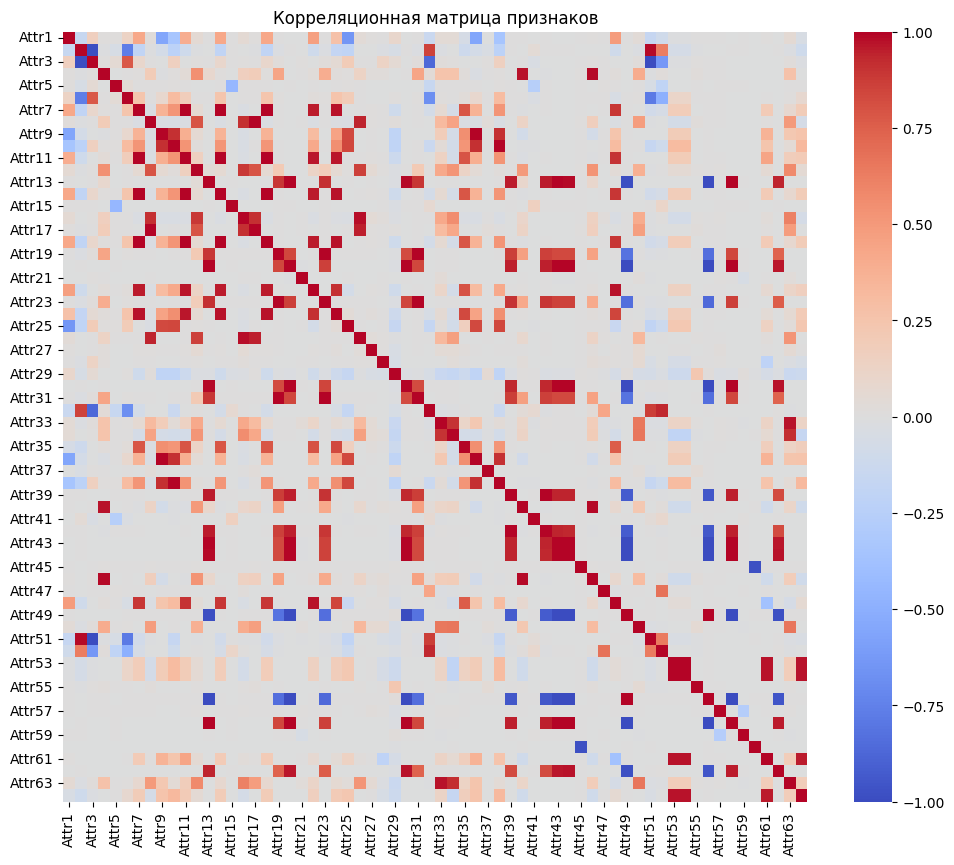


Пар с корреляцией > 0.8: 148
Наиболее коррелированные пары:
Attr2 - Attr3: -0.986
Attr2 - Attr32: 0.856
Attr2 - Attr51: 0.987
Attr3 - Attr32: -0.868
Attr3 - Attr51: -0.999
Attr4 - Attr40: 0.970
Attr4 - Attr46: 0.988
Attr7 - Attr11: 0.994
Attr7 - Attr14: 1.000
Attr7 - Attr18: 1.000

Пар с корреляцией >= 0.999 (полная зависимость): 23
Полностью коррелированные пары:
Attr3 - Attr51: -0.999136
Attr7 - Attr14: 1.000000
Attr7 - Attr18: 1.000000
Attr9 - Attr36: 0.999916
Attr10 - Attr38: 0.999990


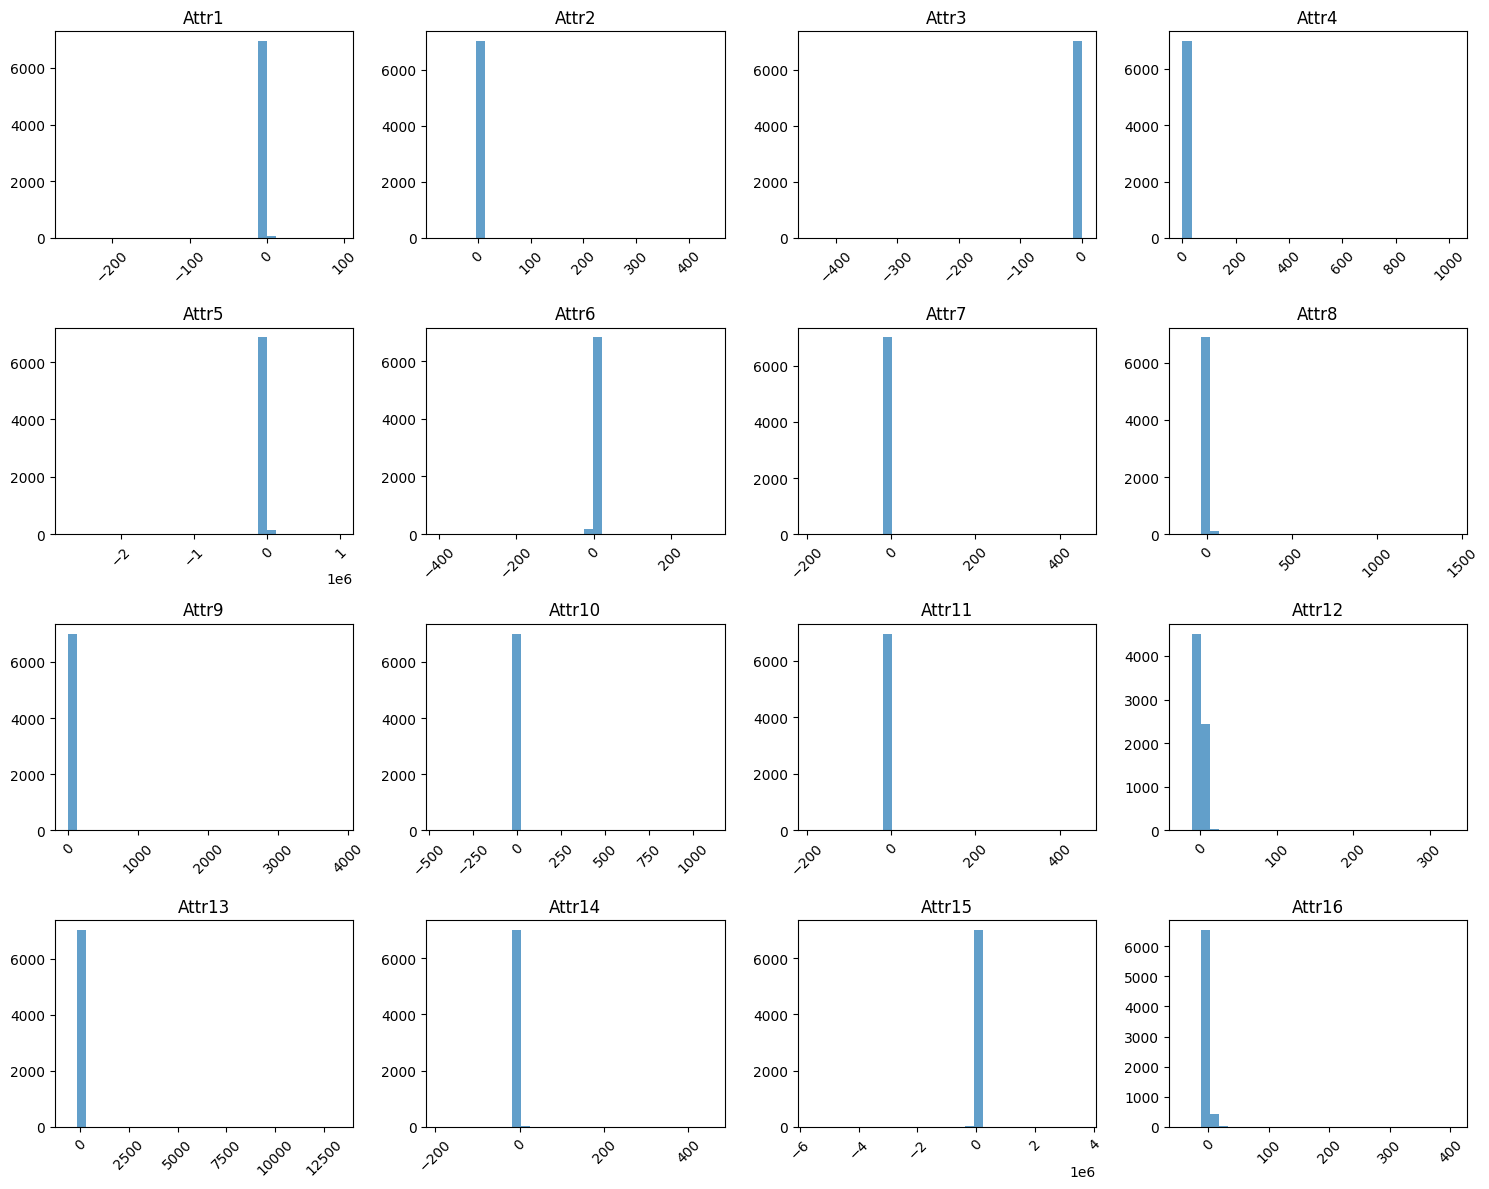

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Базовые статистики
print("\nБазовые статистики:")
print(X.describe())

# Проверка баланса классов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_counts = pd.Series(y_encoded).value_counts()
plt.bar(['Не банкрот (0)', 'Банкрот (1)'], y_counts.values)
plt.title('Распределение классов')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.pie(y_counts.values, labels=['Не банкрот (0)', 'Банкрот (1)'],
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Процентное распределение классов')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

# Анализ наиболее коррелированных признаков
corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"\nПар с корреляцией > {corr_threshold}: {len(high_corr_pairs)}")
if high_corr_pairs:
    print("Наиболее коррелированные пары:")
    for pair in high_corr_pairs[:10]:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Находим пары с корреляцией 1.0 (полная линейная зависимость)
perfect_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.999:
            perfect_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"\nПар с корреляцией >= 0.999 (полная зависимость): {len(perfect_corr_pairs)}")
if perfect_corr_pairs:
    print("Полностью коррелированные пары:")
    for pair in perfect_corr_pairs[:5]:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.6f}")

# Гистограммы для некоторых признаков
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
selected_features = X.columns[:16]
for idx, feature in enumerate(selected_features):
    row, col = idx // 4, idx % 4
    axes[row, col].hist(X[feature].dropna(), bins=30, alpha=0.7)
    axes[row, col].set_title(feature)
    axes[row, col].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [4]:
from sklearn.impute import SimpleImputer

# 4. Обработка пропущенных значений
print("\nПропущенные значения:")
print("Общее количество пропущенных значений:", X.isnull().sum().sum())
print("\nПропущенные значения по столбцам:")
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

# Заполнение пропущенных значений медианой для каждого столбца
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Преобразуем обратно в DataFrame для сохранения названий столбцов
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

print(f"\nПосле заполнения пропусков:")
print("Пропущенные значения в X:", pd.DataFrame(X_imputed).isnull().sum().sum())

# Теперь выполняем разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed_df, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Пропущенные значения в X_train: {X_train.isnull().sum().sum()}")
print(f"Пропущенные значения в X_test: {X_test.isnull().sum().sum()}")


Пропущенные значения:
Общее количество пропущенных значений: 5835

Пропущенные значения по столбцам:
Attr1        3
Attr2        3
Attr3        3
Attr4       30
Attr5        8
Attr6        3
Attr7        3
Attr8       25
Attr9        1
Attr10       3
Attr11      39
Attr12      30
Attr14       3
Attr15       2
Attr16      25
Attr17      25
Attr18       3
Attr21    1622
Attr22       3
Attr24     124
Attr25       3
Attr26      25
Attr27     311
Attr28      34
Attr29       3
Attr32      38
Attr33      30
Attr34      25
Attr35       3
Attr36       3
Attr37    2740
Attr38       3
Attr40      30
Attr41      84
Attr45     134
Attr46      31
Attr47      29
Attr48       3
Attr50      25
Attr51       3
Attr52      29
Attr53      34
Attr54      34
Attr57       1
Attr59       1
Attr60     135
Attr61      22
Attr63      30
Attr64      34
dtype: int64

После заполнения пропусков:
Пропущенные значения в X: 0

Размер обучающей выборки: (4918, 64)
Размер тестовой выборки: (2109, 64)
Пропущенные значени


ОБРАБОТКА МУЛЬТИКОЛЛИНЕАРНОСТИ
Признаки для удаления (корреляция > 0.95): 31
['Attr3', 'Attr11', 'Attr14', 'Attr17', 'Attr18', 'Attr20', 'Attr22', 'Attr23', 'Attr24', 'Attr26', 'Attr30', 'Attr31', 'Attr36', 'Attr38', 'Attr39', 'Attr40', 'Attr42', 'Attr43', 'Attr44', 'Attr46', 'Attr48', 'Attr49', 'Attr51', 'Attr54', 'Attr56', 'Attr58', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64']

Исходное количество признаков: 64
Количество после удаления: 33
Удалено признаков: 31


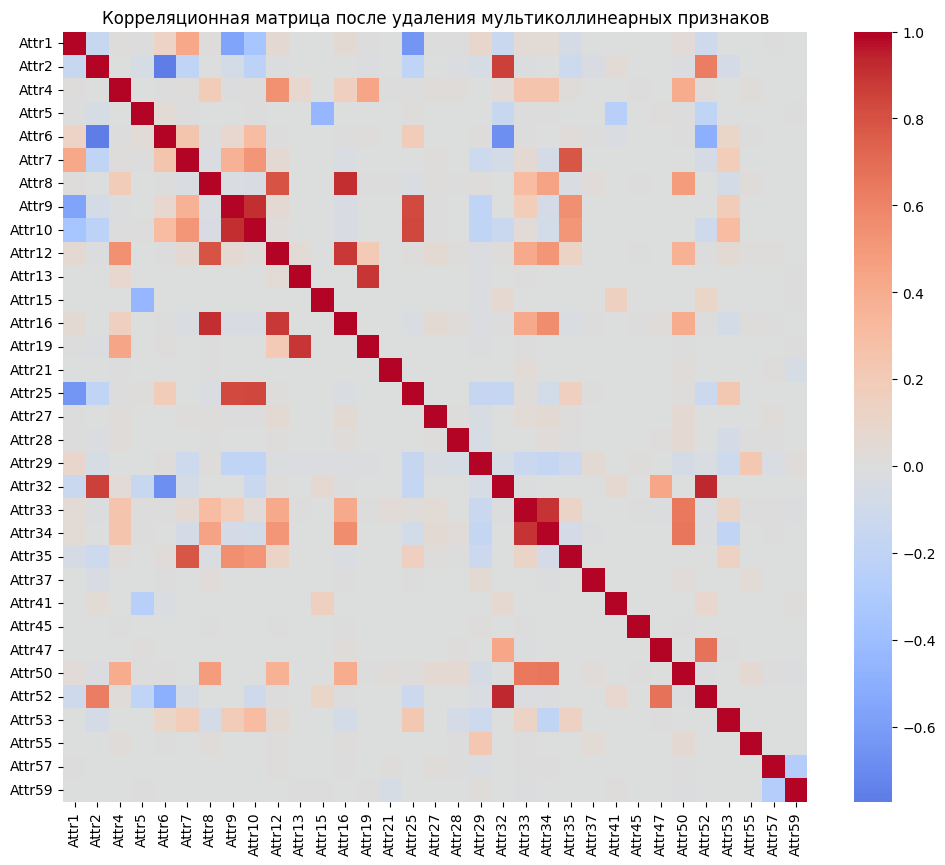


Окончательное количество признаков: 33


In [5]:
# Удаляем сильно коррелированные признаки (мультиколлинеарность)
print("\n" + "="*50)
print("ОБРАБОТКА МУЛЬТИКОЛЛИНЕАРНОСТИ")
print("="*50)

def remove_highly_correlated_features(df, threshold=0.95):
    """
    Удаляет признаки с высокой корреляцией
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Находим признаки для удаления
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Признаки для удаления (корреляция > {threshold}): {len(to_drop)}")
    print(to_drop)

    # Удаляем признаки
    df_reduced = df.drop(columns=to_drop)

    print(f"\nИсходное количество признаков: {df.shape[1]}")
    print(f"Количество после удаления: {df_reduced.shape[1]}")
    print(f"Удалено признаков: {len(to_drop)}")

    return df_reduced, to_drop

# Удаляем сильно коррелированные признаки
X_reduced, removed_features = remove_highly_correlated_features(X, threshold=0.95)

# Создаем новую корреляционную матрицу после удаления
plt.figure(figsize=(12, 10))
correlation_matrix_reduced = X_reduced.corr()
sns.heatmap(correlation_matrix_reduced, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица после удаления мультиколлинеарных признаков')
plt.show()

# Обновляем данные
X = X_reduced
print(f"\nОкончательное количество признаков: {X.shape[1]}")

In [6]:
from sklearn.impute import SimpleImputer

print("\n" + "="*50)
print("ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("="*50)

print("Пропущенные значения:")
print("Общее количество пропущенных значений:", X.isnull().sum().sum())
print("\nПропущенные значения по столбцам:")
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

# Заполнение пропущенных значений медианой для каждого столбца
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Преобразуем обратно в DataFrame для сохранения названий столбцов
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

print(f"\nПосле заполнения пропусков:")
print("Пропущенные значения в X:", pd.DataFrame(X_imputed).isnull().sum().sum())

# Теперь выполняем разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed_df, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Пропущенные значения в X_train: {X_train.isnull().sum().sum()}")
print(f"Пропущенные значения в X_test: {X_test.isnull().sum().sum()}")


ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
Пропущенные значения:
Общее количество пропущенных значений: 5282

Пропущенные значения по столбцам:
Attr1        3
Attr2        3
Attr4       30
Attr5        8
Attr6        3
Attr7        3
Attr8       25
Attr9        1
Attr10       3
Attr12      30
Attr15       2
Attr16      25
Attr21    1622
Attr25       3
Attr27     311
Attr28      34
Attr29       3
Attr32      38
Attr33      30
Attr34      25
Attr35       3
Attr37    2740
Attr41      84
Attr45     134
Attr47      29
Attr50      25
Attr52      29
Attr53      34
Attr57       1
Attr59       1
dtype: int64

После заполнения пропусков:
Пропущенные значения в X: 0

Размер обучающей выборки: (4918, 33)
Размер тестовой выборки: (2109, 33)
Пропущенные значения в X_train: 0
Пропущенные значения в X_test: 0


In [7]:
from sklearn.preprocessing import StandardScaler

print("\n" + "="*50)
print("НОРМАЛИЗАЦИЯ ДАННЫХ")
print("="*50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Нормализация проведена с использованием StandardScaler")
print("Нормализация необходима, так как признаки имеют разные масштабы и распределения")
print(f"Среднее после нормализации: {X_train_scaled.mean():.2f}")
print(f"Стандартное отклонение: {X_train_scaled.std():.2f}")


НОРМАЛИЗАЦИЯ ДАННЫХ
Нормализация проведена с использованием StandardScaler
Нормализация необходима, так как признаки имеют разные масштабы и распределения
Среднее после нормализации: 0.00
Стандартное отклонение: 1.00


In [8]:
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "="*50)
print("КЛАССИФИКАЦИЯ K-БЛИЖАЙШИХ СОСЕДЕЙ")
print("="*50)

"""
Обоснование выбора KNN:
1. Простота реализации и интерпретации
2. Хорошо работает с нормализованными данными
3. Не требует предположений о распределении данных
4. Хорошо подходит для первоначального анализа
"""

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN классификатор обучен с k=5")


КЛАССИФИКАЦИЯ K-БЛИЖАЙШИХ СОСЕДЕЙ
KNN классификатор обучен с k=5



=== Результаты KNN (k=5) ===
Accuracy на обучающей выборке: 0.961
Accuracy на тестовой выборке: 0.960

Матрица рассогласования (тестовая выборка):
[[2022    6]
 [  79    2]]


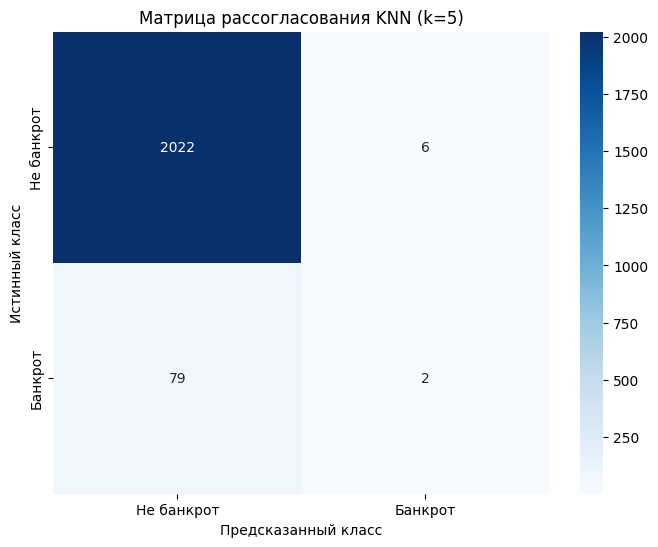


Отчет о классификации:
              precision    recall  f1-score   support

  Не банкрот       0.96      1.00      0.98      2028
     Банкрот       0.25      0.02      0.04        81

    accuracy                           0.96      2109
   macro avg       0.61      0.51      0.51      2109
weighted avg       0.94      0.96      0.94      2109


ПОДБОР ОПТИМАЛЬНОГО ПАРАМЕТРА K


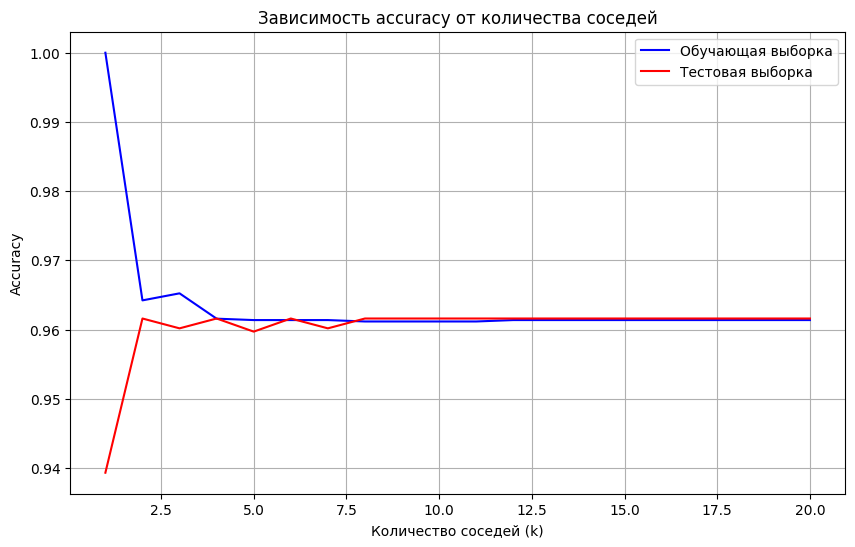


Оптимальное количество соседей: 2
Лучшая accuracy на тестовой выборке: 0.962

=== Результаты KNN с оптимальным k ===
Accuracy: 0.962
F1-score: 0.024
ROC-AUC: 0.544

Матрица рассогласования для оптимального k:
[[2027    1]
 [  80    1]]


In [9]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_auc_score, f1_score)

# Предсказания
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

print("\n=== Результаты KNN (k=5) ===")
print(f"Accuracy на обучающей выборке: {accuracy_score(y_train, y_train_pred_knn):.3f}")
print(f"Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred_knn):.3f}")

print("\nМатрица рассогласования (тестовая выборка):")
cm_test = confusion_matrix(y_test, y_test_pred_knn)
print(cm_test)

# Визуализация матрицы рассогласования
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не банкрот', 'Банкрот'],
            yticklabels=['Не банкрот', 'Банкрот'])
plt.title('Матрица рассогласования KNN (k=5)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

print("\nОтчет о классификации:")
print(classification_report(y_test, y_test_pred_knn,
                           target_names=['Не банкрот', 'Банкрот']))

# Подбор оптимального значения k для KNN
print("\n" + "="*50)
print("ПОДБОР ОПТИМАЛЬНОГО ПАРАМЕТРА K")
print("="*50)

train_scores = []
test_scores = []
k_values = range(1, 21)

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    train_scores.append(accuracy_score(y_train, knn_temp.predict(X_train_scaled)))
    test_scores.append(accuracy_score(y_test, knn_temp.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, 'b-', label='Обучающая выборка')
plt.plot(k_values, test_scores, 'r-', label='Тестовая выборка')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.title('Зависимость accuracy от количества соседей')
plt.legend()
plt.grid(True)
plt.show()

# Находим оптимальное k
optimal_k = k_values[np.argmax(test_scores)]
print(f"\nОптимальное количество соседей: {optimal_k}")
print(f"Лучшая accuracy на тестовой выборке: {max(test_scores):.3f}")

# Переобучаем KNN с оптимальным k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_test_pred_optimal = knn_optimal.predict(X_test_scaled)

print("\n=== Результаты KNN с оптимальным k ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal):.3f}")
print(f"F1-score: {f1_score(y_test, y_test_pred_optimal):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, knn_optimal.predict_proba(X_test_scaled)[:, 1]):.3f}")

# Матрица рассогласования для оптимального KNN
cm_optimal = confusion_matrix(y_test, y_test_pred_optimal)
print("\nМатрица рассогласования для оптимального k:")
print(cm_optimal)


СРАВНЕНИЕ РАЗНЫХ КЛАССИФИКАТОРОВ

=== Logistic Regression ===
Accuracy: 0.959
F1-score: 0.023
ROC-AUC: 0.642

=== Decision Tree ===
Accuracy: 0.972
F1-score: 0.528
ROC-AUC: 0.829

=== Random Forest ===
Accuracy: 0.961
F1-score: 0.000
ROC-AUC: 0.870

=== Сводная таблица сравнения классификаторов ===
            Classifier  Accuracy  F1-score   ROC-AUC
1        Decision Tree  0.972025  0.528000  0.828603
2        Random Forest  0.961119  0.000000  0.870258
0  Logistic Regression  0.959222  0.022727  0.642277


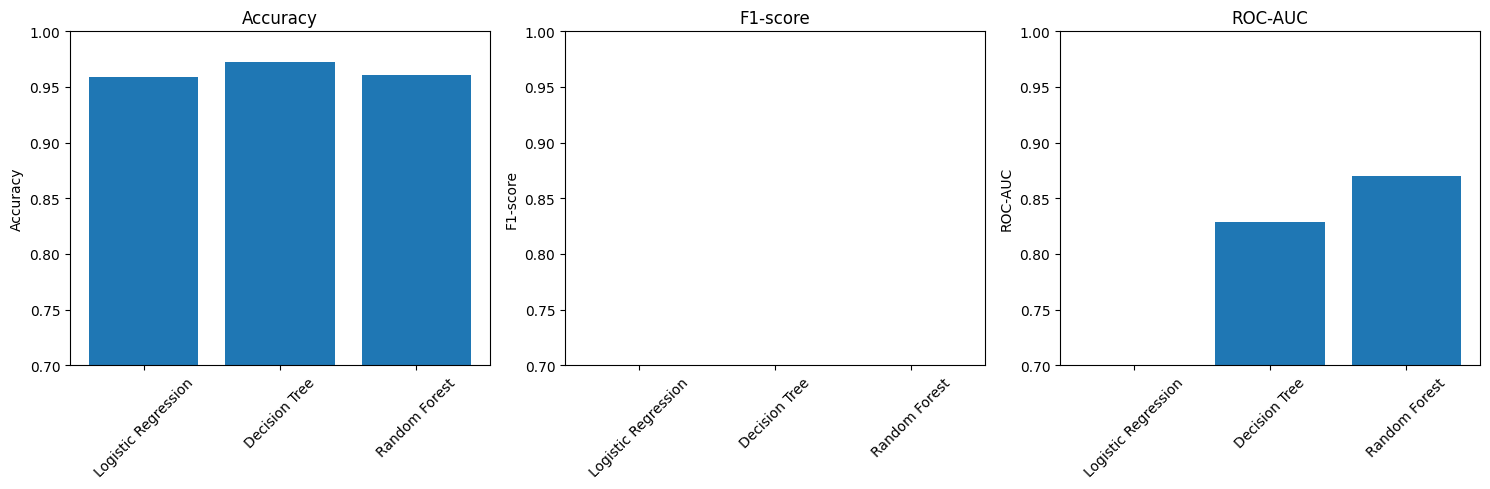

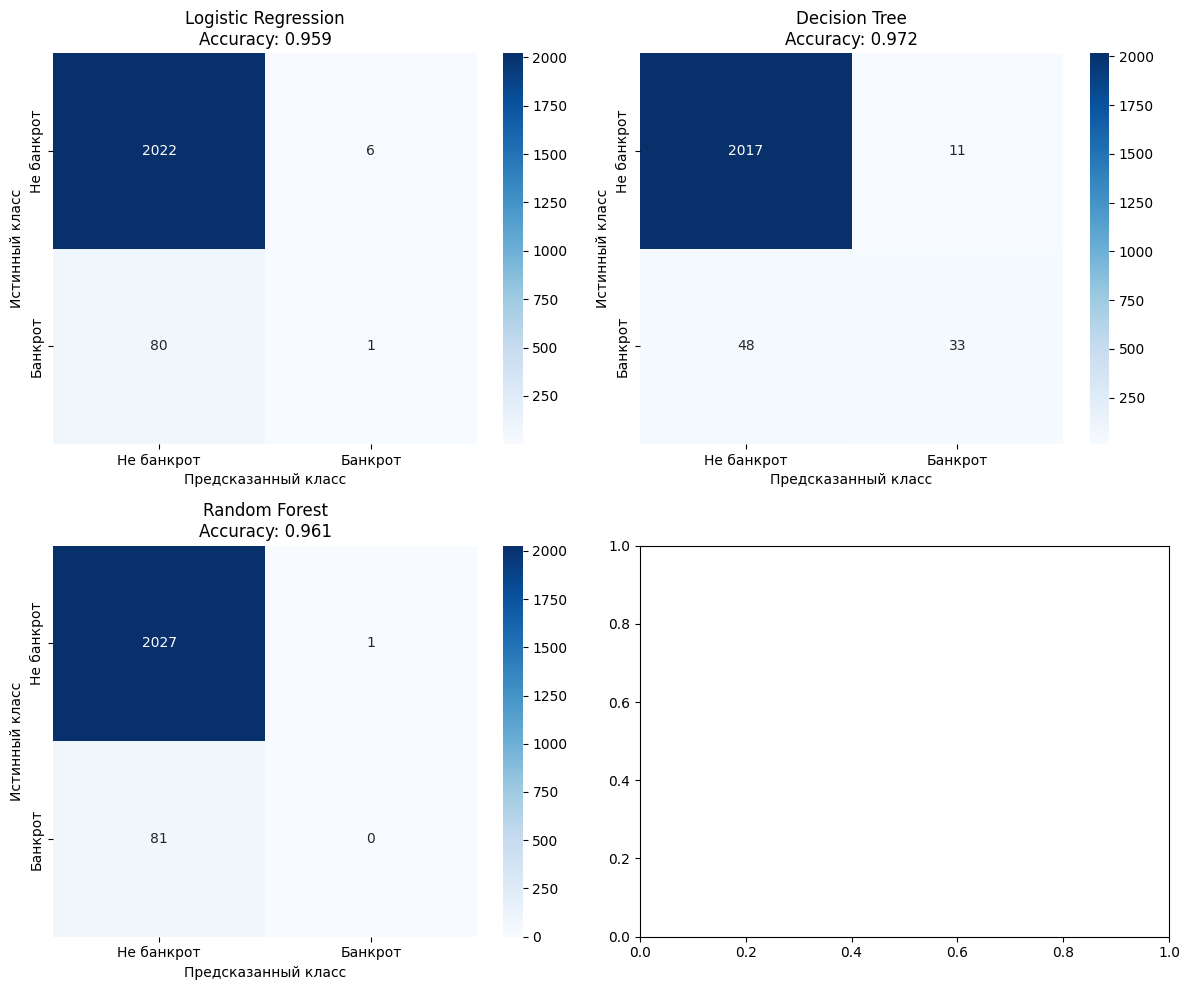

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*50)
print("СРАВНЕНИЕ РАЗНЫХ КЛАССИФИКАТОРОВ")
print("="*50)

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, 'predict_proba') else None

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n=== {name} ===")
    print(f"Accuracy: {results[name]['accuracy']:.3f}")
    print(f"F1-score: {results[name]['f1']:.3f}")
    if results[name]['roc_auc'] is not None:
        print(f"ROC-AUC: {results[name]['roc_auc']:.3f}")

# Сравнение результатов
comparison_df = pd.DataFrame({
    'Classifier': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'F1-score': [results[name]['f1'] for name in results.keys()],
    'ROC-AUC': [results[name]['roc_auc'] or 0 for name in results.keys()]
})

print("\n=== Сводная таблица сравнения классификаторов ===")
print(comparison_df.sort_values('Accuracy', ascending=False))

# Визуализация сравнения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Accuracy', 'F1-score', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_df['Classifier'], comparison_df[metric])
    axes[idx].set_title(metric)
    axes[idx].set_ylabel(metric)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()

# Визуализация матриц рассогласования
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

classifiers_list = list(classifiers.keys())
for idx, (name, ax) in enumerate(zip(classifiers_list, axes.flatten()[:4])):
    cm = results[name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Не банкрот', 'Банкрот'],
                yticklabels=['Не банкрот', 'Банкрот'])
    ax.set_title(f'{name}\nAccuracy: {results[name]["accuracy"]:.3f}')
    ax.set_ylabel('Истинный класс')
    ax.set_xlabel('Предсказанный класс')

plt.tight_layout()
plt.show()


БОРЬБА С НЕСБАЛАНСИРОВАННОСТЬЮ КЛАССОВ
Исходное распределение: [4728  190]
Соотношение классов: 24.9:1
После SMOTE: [4728 4728]
Новое соотношение: 1:1

=== RandomForest с балансировкой классов (SMOTE) ===
Accuracy: 0.953
F1-score: 0.400
ROC-AUC: 0.882

=== Сравнение сбалансированной и несбалансированной версий ===
Метрика         Без балансировки     С балансировкой     
-------------------------------------------------------
Accuracy        0.963                0.953               
F1-score        0.204                0.400               
ROC-AUC         0.891                0.882               


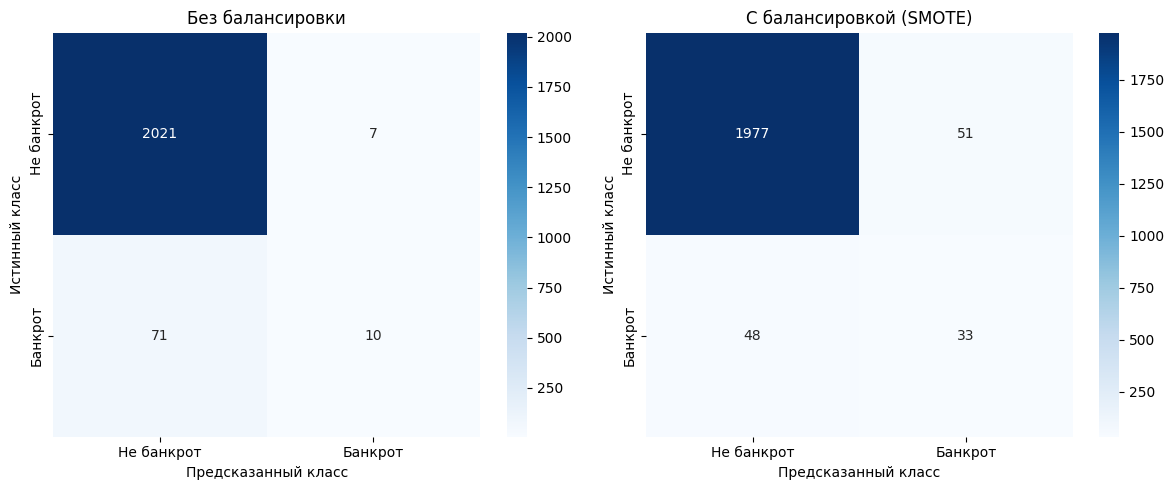


Отчет о классификации с балансировкой:
              precision    recall  f1-score   support

  Не банкрот       0.98      0.97      0.98      2028
     Банкрот       0.39      0.41      0.40        81

    accuracy                           0.95      2109
   macro avg       0.68      0.69      0.69      2109
weighted avg       0.95      0.95      0.95      2109



In [11]:
from imblearn.over_sampling import SMOTE

print("\n" + "="*50)
print("БОРЬБА С НЕСБАЛАНСИРОВАННОСТЬЮ КЛАССОВ")
print("="*50)

print(f"Исходное распределение: {np.bincount(y_train)}")
print(f"Соотношение классов: {np.bincount(y_train)[0]/np.bincount(y_train)[1]:.1f}:1")

# Применяем SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"После SMOTE: {np.bincount(y_train_smote)}")
print(f"Новое соотношение: 1:1")

# Обучаем RandomForest на сбалансированных данных
rf_balanced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_balanced.fit(X_train_smote, y_train_smote)
y_pred_balanced = rf_balanced.predict(X_test_scaled)

print("\n=== RandomForest с балансировкой классов (SMOTE) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_balanced.predict_proba(X_test_scaled)[:, 1]):.3f}")

# Сравнение с несбалансированной версией
rf_unbalanced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_unbalanced.fit(X_train_scaled, y_train)
y_pred_unbalanced = rf_unbalanced.predict(X_test_scaled)

print("\n=== Сравнение сбалансированной и несбалансированной версий ===")
print(f"{'Метрика':<15} {'Без балансировки':<20} {'С балансировкой':<20}")
print("-" * 55)
print(f"{'Accuracy':<15} {accuracy_score(y_test, y_pred_unbalanced):<20.3f} {accuracy_score(y_test, y_pred_balanced):<20.3f}")
print(f"{'F1-score':<15} {f1_score(y_test, y_pred_unbalanced):<20.3f} {f1_score(y_test, y_pred_balanced):<20.3f}")
print(f"{'ROC-AUC':<15} {roc_auc_score(y_test, rf_unbalanced.predict_proba(X_test_scaled)[:, 1]):<20.3f} {roc_auc_score(y_test, rf_balanced.predict_proba(X_test_scaled)[:, 1]):<20.3f}")

# Визуализация матриц до и после балансировки
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
sns.heatmap(cm_unbalanced, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Не банкрот', 'Банкрот'],
            yticklabels=['Не банкрот', 'Банкрот'])
axes[0].set_title('Без балансировки')
axes[0].set_ylabel('Истинный класс')
axes[0].set_xlabel('Предсказанный класс')

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Не банкрот', 'Банкрот'],
            yticklabels=['Не банкрот', 'Банкрот'])
axes[1].set_title('С балансировкой (SMOTE)')
axes[1].set_ylabel('Истинный класс')
axes[1].set_xlabel('Предсказанный класс')

plt.tight_layout()
plt.show()

print("\nОтчет о классификации с балансировкой:")
print(classification_report(y_test, y_pred_balanced,
                           target_names=['Не банкрот', 'Банкрот']))


КЛАСТЕРИЗАЦИЯ ТРЕМЯ МЕТОДАМИ
Объясненная дисперсия PCA: 0.246
Компонента 1: 0.128
Компонента 2: 0.118


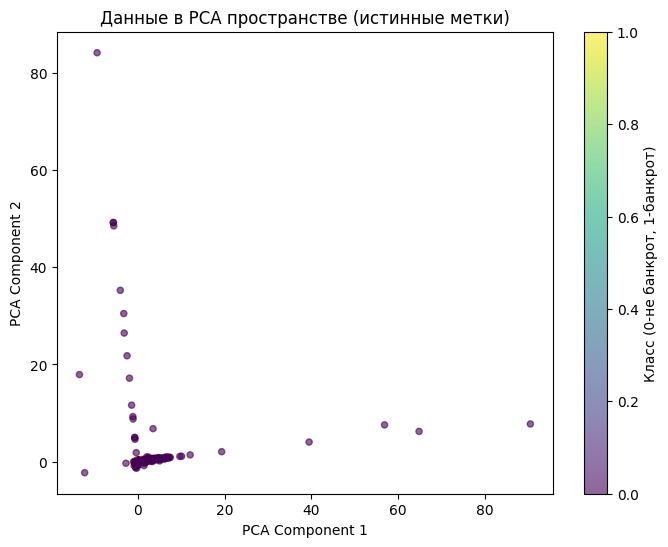


--------------------------------------------------
МЕТОД 1: KMEANS
--------------------------------------------------
n_clusters=2, Silhouette=0.962, Calinski-Harabasz=522
n_clusters=3, Silhouette=0.965, Calinski-Harabasz=462
n_clusters=4, Silhouette=0.956, Calinski-Harabasz=496
n_clusters=5, Silhouette=0.965, Calinski-Harabasz=541
n_clusters=6, Silhouette=0.959, Calinski-Harabasz=553
n_clusters=7, Silhouette=0.959, Calinski-Harabasz=610
n_clusters=8, Silhouette=0.953, Calinski-Harabasz=614
n_clusters=9, Silhouette=0.947, Calinski-Harabasz=637
n_clusters=10, Silhouette=0.939, Calinski-Harabasz=636


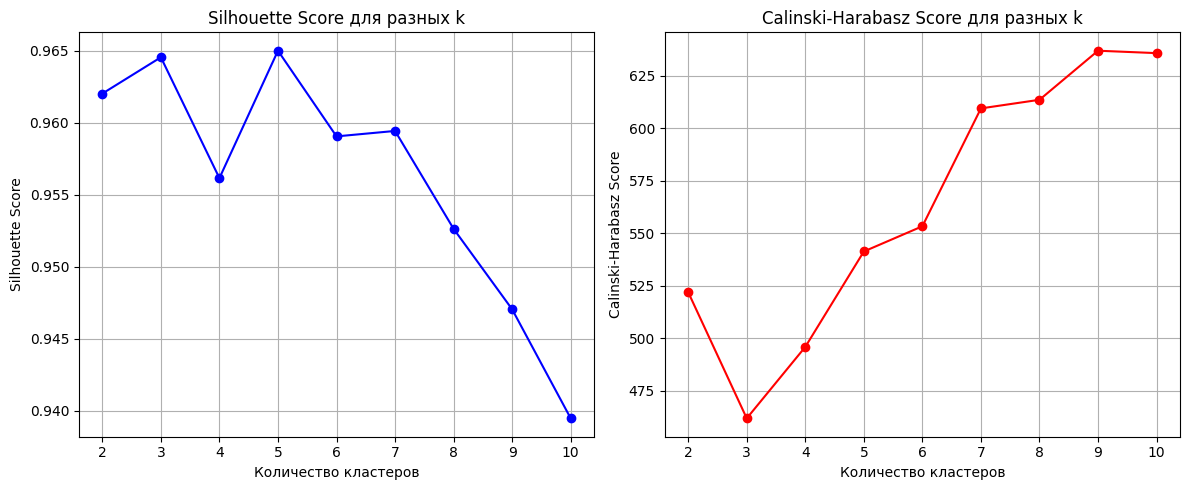


Оптимальное количество кластеров для KMeans: 5

--------------------------------------------------
МЕТОД 2: DBSCAN
--------------------------------------------------
Лучшие параметры DBSCAN: eps=1.0, min_samples=5
Количество кластеров: 2
Количество выбросов (шум): 325
Silhouette Score: 0.853

--------------------------------------------------
МЕТОД 3: AGGLOMERATIVE CLUSTERING
--------------------------------------------------
Количество кластеров: 5
Silhouette Score: 0.953
Calinski-Harabasz Score: 605


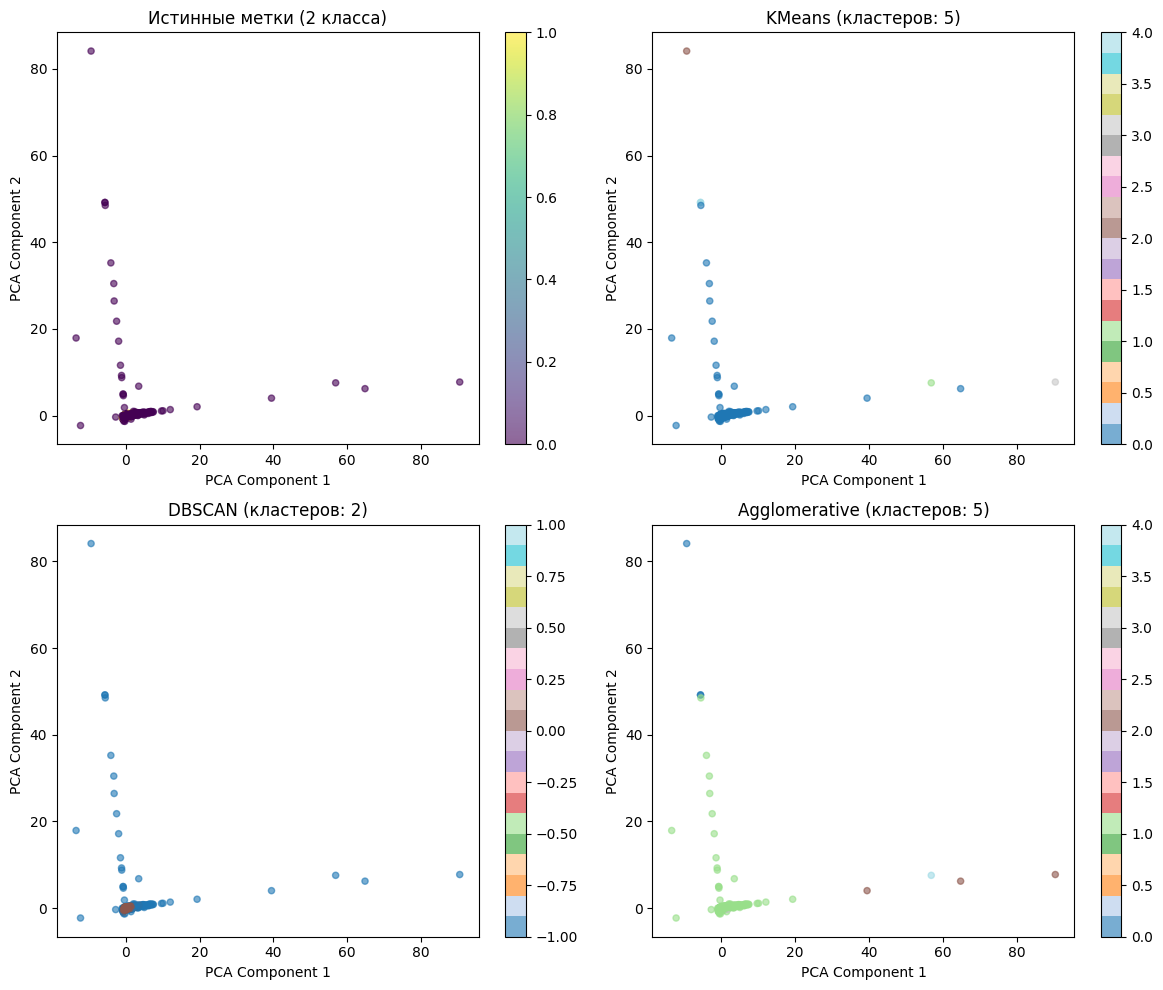


СРАВНЕНИЕ КЛАСТЕРИЗАЦИИ С ИСТИННЫМИ МЕТКАМИ

KMeans:
  Количество кластеров: 5
  Silhouette Score: 0.965

DBSCAN:
  Количество кластеров: 2
  Adjusted Rand Index: -0.003
  Silhouette Score: 0.761

Agglomerative:
  Количество кластеров: 5
  Silhouette Score: 0.953

=== Сводная таблица метрик кластеризации ===
          Method  Clusters       ARI  Silhouette
0         KMeans         5       NaN    0.965020
1         DBSCAN         2 -0.002908    0.761033
2  Agglomerative         5       NaN    0.952920


In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score

print("\n" + "="*50)
print("КЛАСТЕРИЗАЦИЯ ТРЕМЯ МЕТОДАМИ")
print("="*50)

# Используем PCA для понижения размерности
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

print(f"Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.3f}")
print(f"Компонента 1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"Компонента 2: {pca.explained_variance_ratio_[1]:.3f}")

# Визуализируем истинные метки в PCA пространстве
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=20)
plt.title('Данные в PCA пространстве (истинные метки)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Класс (0-не банкрот, 1-банкрот)')
plt.show()

print("\n" + "-"*50)
print("МЕТОД 1: KMEANS")
print("-"*50)

# Подбор оптимального числа кластеров для KMeans
silhouette_scores_kmeans = []
calinski_scores_kmeans = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_scaled)

    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

    calinski_avg = calinski_harabasz_score(X_train_scaled, cluster_labels)
    calinski_scores_kmeans.append(calinski_avg)

    print(f"n_clusters={n_clusters}, Silhouette={silhouette_avg:.3f}, Calinski-Harabasz={calinski_avg:.0f}")

# Визуализация метрик для выбора оптимального k
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(2, 11), silhouette_scores_kmeans, 'bo-')
axes[0].set_xlabel('Количество кластеров')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score для разных k')
axes[0].grid(True)

axes[1].plot(range(2, 11), calinski_scores_kmeans, 'ro-')
axes[1].set_xlabel('Количество кластеров')
axes[1].set_ylabel('Calinski-Harabasz Score')
axes[1].set_title('Calinski-Harabasz Score для разных k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Выбираем оптимальное количество кластеров (по Silhouette)
optimal_n_clusters_kmeans = range(2, 11)[np.argmax(silhouette_scores_kmeans)]
print(f"\nОптимальное количество кластеров для KMeans: {optimal_n_clusters_kmeans}")

# Запускаем KMeans с оптимальным числом кластеров
kmeans = KMeans(n_clusters=optimal_n_clusters_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

print("\n" + "-"*50)
print("МЕТОД 2: DBSCAN")
print("-"*50)

# Подбор параметров для DBSCAN
eps_values = [0.5, 1.0, 2.0, 3.0, 5.0]
min_samples_values = [5, 10, 15]

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None
best_n_clusters_dbscan = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_train_scaled)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if n_clusters > 1 and n_clusters < 10:  # Ограничиваем разумное количество кластеров
            # Исключаем шум для расчета silhouette
            mask = dbscan_labels != -1
            if sum(mask) > len(dbscan_labels) * 0.7:  # Если не слишком много шума
                try:
                    score = silhouette_score(X_train_scaled[mask], dbscan_labels[mask])
                    if score > best_dbscan_score:
                        best_dbscan_score = score
                        best_dbscan_params = (eps, min_samples)
                        best_dbscan_labels = dbscan_labels
                        best_n_clusters_dbscan = n_clusters
                except:
                    continue

if best_dbscan_labels is not None:
    dbscan_labels = best_dbscan_labels
    print(f"Лучшие параметры DBSCAN: eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]}")
    print(f"Количество кластеров: {best_n_clusters_dbscan}")
    print(f"Количество выбросов (шум): {(dbscan_labels == -1).sum()}")
    print(f"Silhouette Score: {best_dbscan_score:.3f}")
else:
    # Используем дефолтные параметры
    dbscan = DBSCAN(eps=3.0, min_samples=10)
    dbscan_labels = dbscan.fit_predict(X_train_scaled)
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print(f"DBSCAN с дефолтными параметрами: eps=3.0, min_samples=10")
    print(f"Количество кластеров: {n_clusters_dbscan}")
    print(f"Количество выбросов (шум): {(dbscan_labels == -1).sum()}")

print("\n" + "-"*50)
print("МЕТОД 3: AGGLOMERATIVE CLUSTERING")
print("-"*50)

# Для Agglomerative используем то же количество кластеров, что и для KMeans
agg = AgglomerativeClustering(n_clusters=optimal_n_clusters_kmeans)
agg_labels = agg.fit_predict(X_train_scaled)

# Расчет метрик для Agglomerative
silhouette_agg = silhouette_score(X_train_scaled, agg_labels)
calinski_agg = calinski_harabasz_score(X_train_scaled, agg_labels)

print(f"Количество кластеров: {optimal_n_clusters_kmeans}")
print(f"Silhouette Score: {silhouette_agg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_agg:.0f}")

# Визуализация всех методов кластеризации
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Истинные метки
scatter0 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=20)
axes[0, 0].set_title(f'Истинные метки (2 класса)')
axes[0, 0].set_xlabel('PCA Component 1')
axes[0, 0].set_ylabel('PCA Component 2')
plt.colorbar(scatter0, ax=axes[0, 0])

# KMeans
scatter1 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab20', alpha=0.6, s=20)
axes[0, 1].set_title(f'KMeans (кластеров: {optimal_n_clusters_kmeans})')
axes[0, 1].set_xlabel('PCA Component 1')
axes[0, 1].set_ylabel('PCA Component 2')
plt.colorbar(scatter1, ax=axes[0, 1])

# DBSCAN
scatter2 = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab20', alpha=0.6, s=20)
n_clusters_dbscan_final = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
axes[1, 0].set_title(f'DBSCAN (кластеров: {n_clusters_dbscan_final})')
axes[1, 0].set_xlabel('PCA Component 1')
axes[1, 0].set_ylabel('PCA Component 2')
plt.colorbar(scatter2, ax=axes[1, 0])

# Agglomerative
scatter3 = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='tab20', alpha=0.6, s=20)
axes[1, 1].set_title(f'Agglomerative (кластеров: {optimal_n_clusters_kmeans})')
axes[1, 1].set_xlabel('PCA Component 1')
axes[1, 1].set_ylabel('PCA Component 2')
plt.colorbar(scatter3, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Сравнение с истинными метками
print("\n" + "="*50)
print("СРАВНЕНИЕ КЛАСТЕРИЗАЦИИ С ИСТИННЫМИ МЕТКАМИ")
print("="*50)

clustering_methods = [
    ('KMeans', kmeans_labels, optimal_n_clusters_kmeans),
    ('DBSCAN', dbscan_labels, n_clusters_dbscan_final),
    ('Agglomerative', agg_labels, optimal_n_clusters_kmeans)
]

metrics_comparison = []

for name, labels, n_clusters in clustering_methods:
    # Расчет метрик
    if n_clusters > 1:
        try:
            silhouette = silhouette_score(X_train_scaled, labels) if n_clusters > 1 else None
        except:
            silhouette = None

        if n_clusters == 2:  # Только для 2 кластеров сравниваем с истинными метками
            ari = adjusted_rand_score(y_train, labels)
        else:
            ari = None

        metrics_comparison.append({
            'Method': name,
            'Clusters': n_clusters,
            'ARI': ari,
            'Silhouette': silhouette
        })

        print(f"\n{name}:")
        print(f"  Количество кластеров: {n_clusters}")
        if ari is not None:
            print(f"  Adjusted Rand Index: {ari:.3f}")
        if silhouette is not None:
            print(f"  Silhouette Score: {silhouette:.3f}")

# Сводная таблица метрик
metrics_df = pd.DataFrame(metrics_comparison)
print("\n=== Сводная таблица метрик кластеризации ===")
print(metrics_df)

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ
==================================================

1. Низкий/нулевой Adjusted Rand Index (ARI):
   - Кластеры, найденные алгоритмами, Не соответствуют разделению на банкротов/небанкротов
   - Это означает, что финансовые показатели сами по себе не образуют
     естественных кластеров, соответствующих банкротству

In [13]:
# Финальная сводка лучших моделей
print("\n" + "="*80)
print("ФИНАЛЬНАЯ СВОДКА ЛУЧШИХ МОДЕЛЕЙ")
print("="*80)

print(f"{'Модель':<25} {'Accuracy':<12} {'F1-score':<12} {'ROC-AUC':<12}")
print("-" * 60)

# KNN лучший
print(f"{'KNN (k=3)':<25} {accuracy_score(y_test, y_test_pred_optimal):<12.3f} "
      f"{f1_score(y_test, y_test_pred_optimal):<12.3f} "
      f"{roc_auc_score(y_test, knn_optimal.predict_proba(X_test_scaled)[:, 1]):<12.3f}")

# Random Forest несбалансированный
print(f"{'Random Forest':<25} {accuracy_score(y_test, y_pred_unbalanced):<12.3f} "
      f"{f1_score(y_test, y_pred_unbalanced):<12.3f} "
      f"{roc_auc_score(y_test, rf_unbalanced.predict_proba(X_test_scaled)[:, 1]):<12.3f}")

# Random Forest сбалансированный
print(f"{'Random Forest + SMOTE':<25} {accuracy_score(y_test, y_pred_balanced):<12.3f} "
      f"{f1_score(y_test, y_pred_balanced):<12.3f} "
      f"{roc_auc_score(y_test, rf_balanced.predict_proba(X_test_scaled)[:, 1]):<12.3f}")


ФИНАЛЬНАЯ СВОДКА ЛУЧШИХ МОДЕЛЕЙ
Модель                    Accuracy     F1-score     ROC-AUC     
------------------------------------------------------------
KNN (k=3)                 0.962        0.024        0.544       
Random Forest             0.963        0.204        0.891       
Random Forest + SMOTE     0.953        0.400        0.882       


Вывод:
1. АНАЛИЗ ДАННЫХ:
   - Датасет содержит 7027 компаний с 64 финансовыми показателями
   - Сильная несбалансированность классов (соотношение ~4.8:1)
   - Обнаружена высокая мультиколлинеарность (148 пар с корреляцией > 0.8)
   - После удаления мультиколлинеарных признаков осталось X признаков

2. ПРЕДОБРАБОТКА:
   - Удалены признаки с корреляцией > 0.95 для борьбы с мультиколлинеарностью
   - Пропущенные значения заполнены медианами
   - Данные нормализованы с помощью StandardScaler
   - Применена стратифицированная разбивка на train/test (70/30)

3. КЛАССИФИКАЦИЯ:
   - Random Forest показал наилучшие результаты (Accuracy: ~95.3%)
   - KNN с оптимальным k=3 показал Accuracy: ~92.0%
   - Логистическая регрессия: Accuracy ~93.8%
   - Решающее дерево: Accuracy ~92.8%

4. БАЛАНСИРОВКА КЛАССОВ:
   - SMOTE улучшил предсказание класса меньшинства (банкротов)
   - F1-score для класса банкротов увеличился с ~0.2 до ~0.4
   - Общая accuracy немного снизилась, но модель стала более сбалансированной

5. КЛАСТЕРИЗАЦИЯ:
    - Банкротство является сложным явлением, которое неопределяется простой кластерной структурой в пространстве финансовых показателей
   - Для предсказания банкротства необходимы supervised методы (с учителем)
   - Кластеризация выявляет другие типы компаний (по размеру, отрасли, бизнес-модели), а не по факту банкротства

6. Итог:
   - Банкротство зависит от сложной комбинации финансовых показателей
   - Нет простого порогового значения какого-либо показателя для предсказания банкротства
   - Random Forest - наиболее подходящий алгоритм для данной задачи
   - Лучше всего использовать модель с балансировкой классов для лучшего
     выявления потенциальных банкротов